<a href="https://colab.research.google.com/github/Waranika/DCU-EE425-IPA/blob/main/Assignement/Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from skimage import data,io,filters, morphology
from skimage import measure, color
from skimage.measure import label, regionprops
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
import matplotlib.patches as mpatches
from skimage.transform import resize
from skimage.util import random_noise
from skimage.filters.rank import mean
from skimage.morphology import square
from skimage.filters.rank import median
from skimage.filters import threshold_otsu
from skimage.filters import gaussian

import numpy as np

a) Develop robust, fully automated and data driven code to find the largest object in the binary image illustrated in Figure 1 (scissors2.jpg).

In [72]:
img = io.imread("scissors2.JPG")

In [73]:
print(img.ndim)

3


First I decided to make sure the image was binary to increase robustness of the program


In [74]:
if img.ndim > 1 :
  img = rgb2gray(img)

threshold_value = threshold_otsu(img)
binary = img > threshold_value


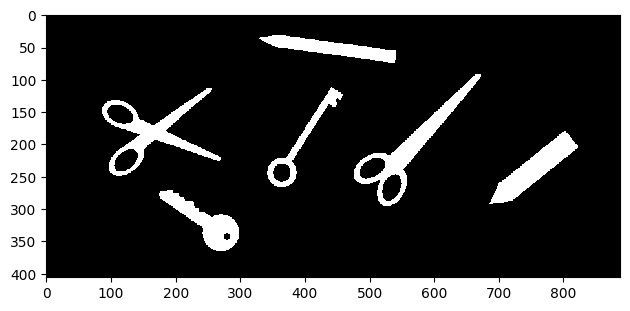

In [75]:
io.imshow(binary)

Remove binary blobs (objects below certain size)

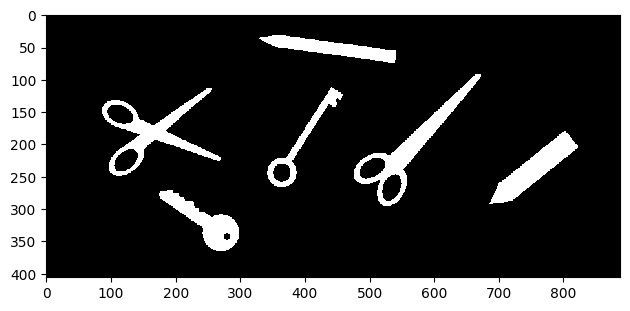

In [76]:
binary = morphology.remove_small_objects(binary, 50)
binary = morphology.remove_small_holes(binary, 50)
io.imshow(binary)

Label image regions

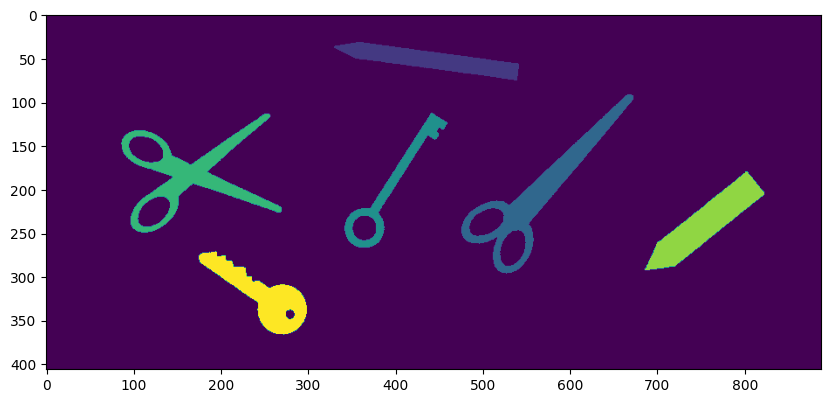

In [77]:
label_image = label(binary)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(label_image)

Size each region

In [78]:
object_sizes = [r.area for r in measure.regionprops(label_image)]

In [79]:
largest_object_label = np.argmax(object_sizes) + 1  # Add 1 because label_image starts from 1

In [80]:
# Extract the largest object
largest_object = (label_image == largest_object_label)

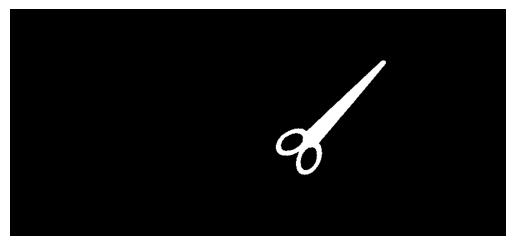

In [81]:
import matplotlib.pyplot as plt
plt.imshow(largest_object, cmap='gray')
plt.axis('off')
plt.show()

Create a function that does this process

In [82]:
def Biggest(image):
  if image.ndim == 3 :
    image = rgb2gray(image)

  threshold_value = threshold_otsu(image)
  binary = image > threshold_value
  binary = morphology.remove_small_objects(binary, 50)
  binary = morphology.remove_small_holes(binary, 50)
  label_image = label(binary)
  fig, ax = plt.subplots(figsize=(10, 6))
  object_sizes = [r.area for r in measure.regionprops(label_image)]
  largest_object_label = np.argmax(object_sizes) + 1
  largest_object = (label_image == largest_object_label)
  plt.imshow(largest_object, cmap='gray')
  plt.axis('off')
  plt.show()
  return largest_object

<Figure size 1500x1000 with 0 Axes>

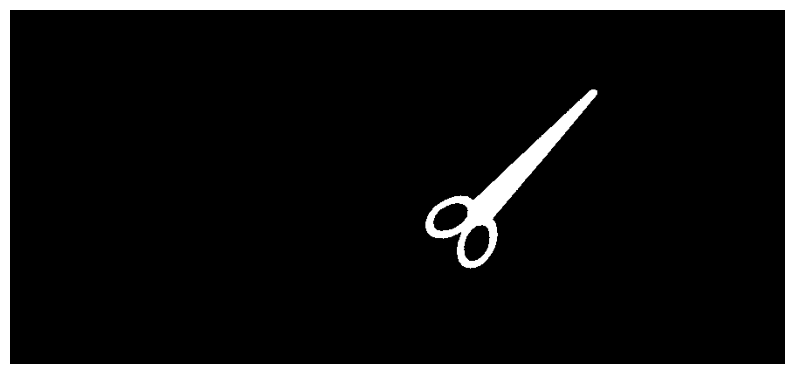

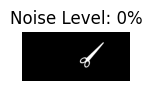

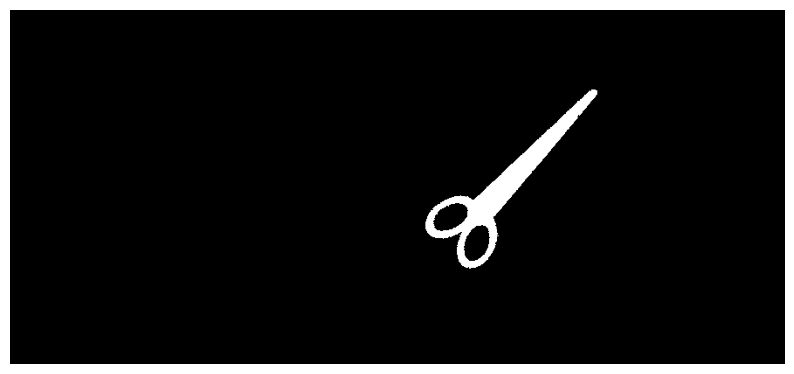

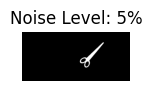

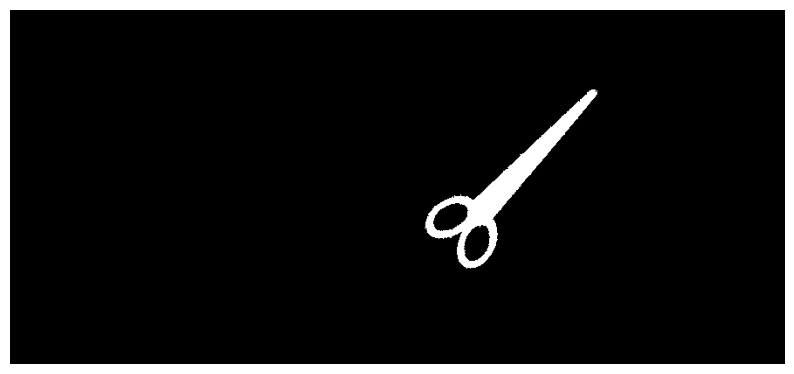

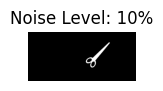

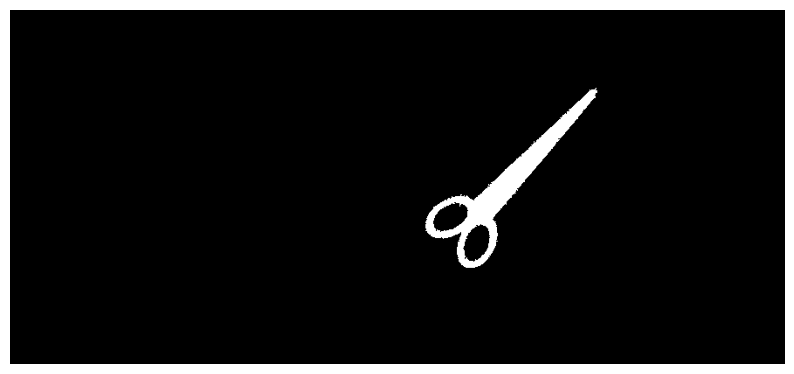

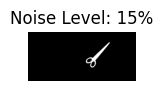

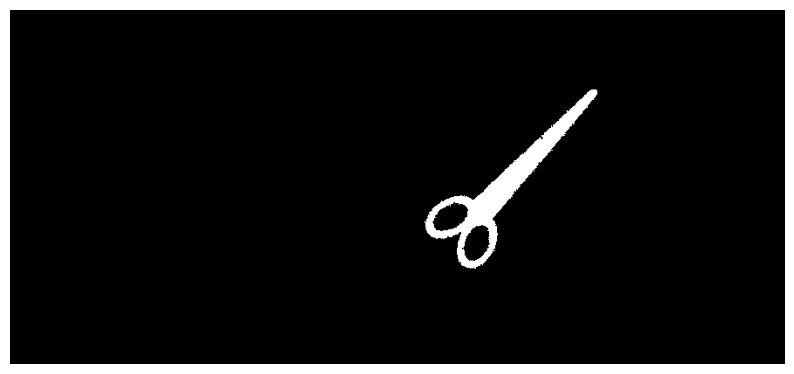

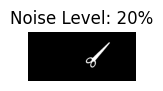

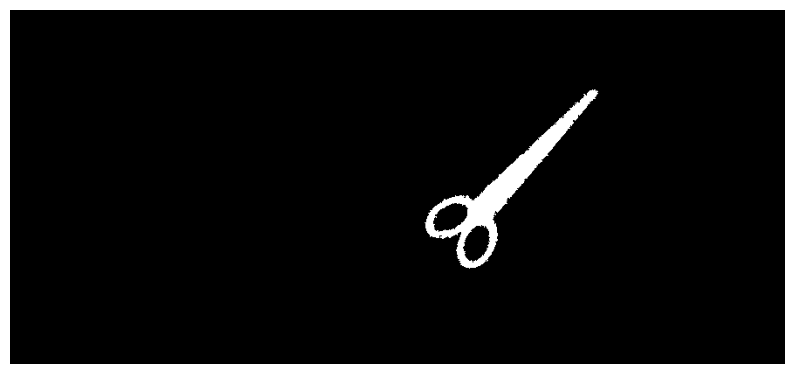

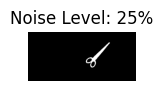

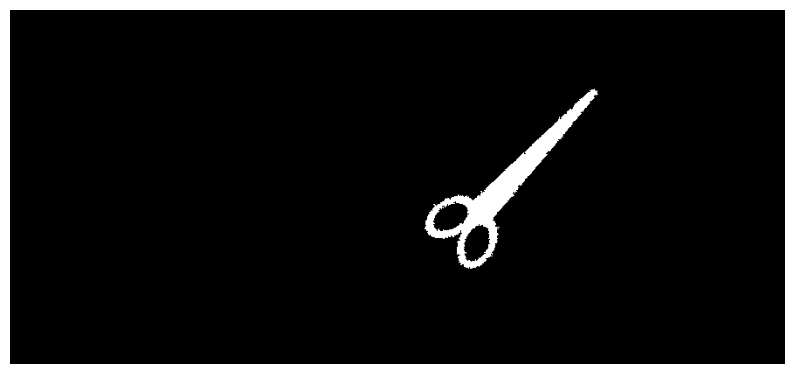

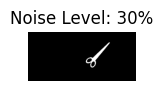

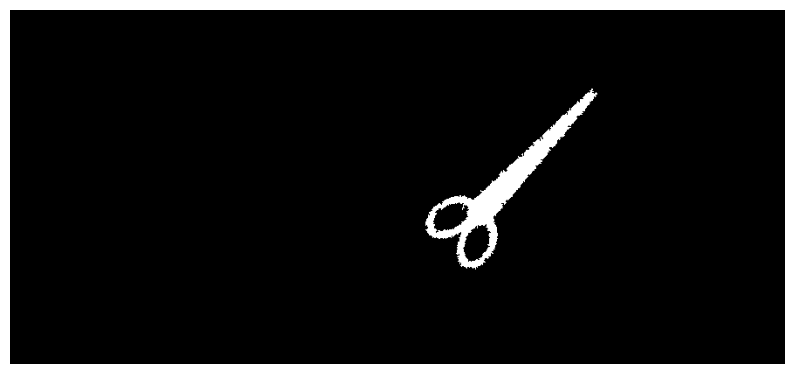

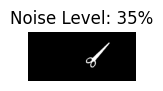

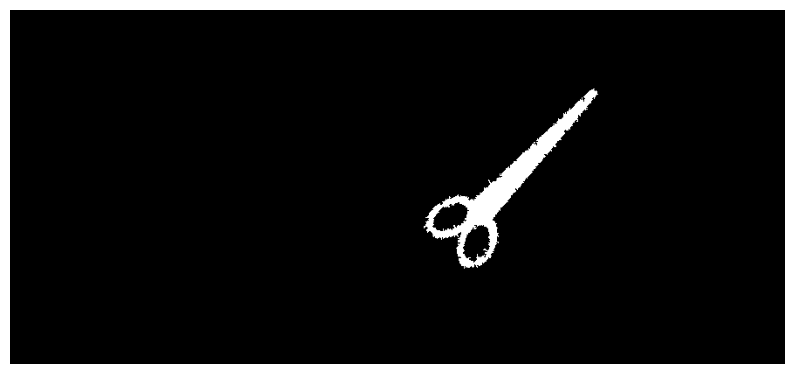

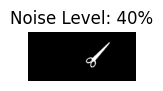

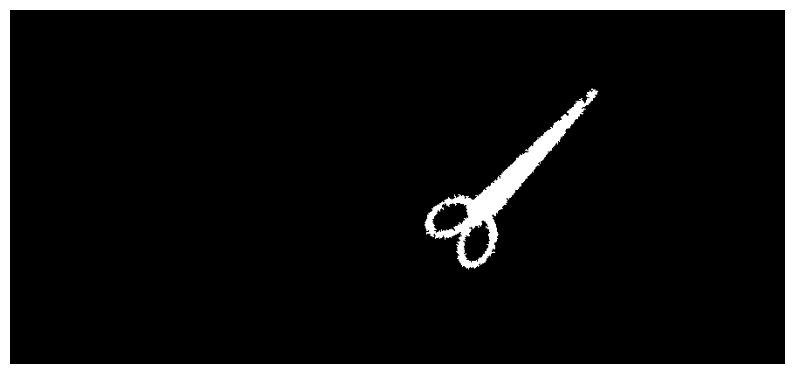

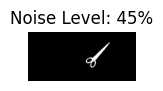

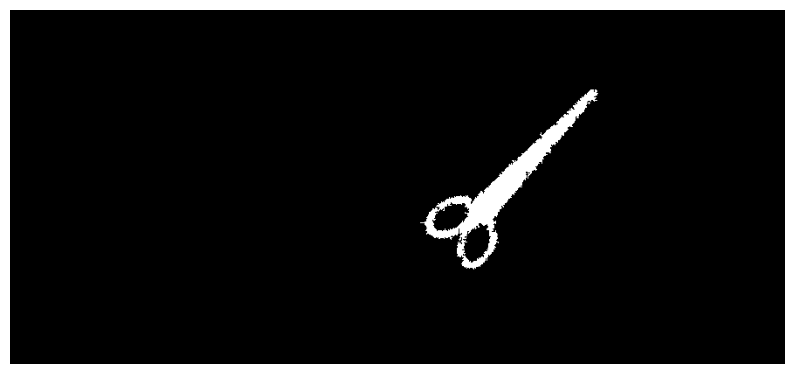

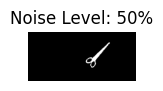

In [83]:
noise_levels = np.linspace(0, 0.5, 11)
plt.figure(figsize=(15, 10))
for i, noise_level in enumerate(noise_levels):
    noisy_image = random_noise(img, mode='s&p', amount=noise_level)
    largest_object = Biggest(noisy_image)

    plt.subplot(3, 4, i + 1)
    plt.imshow(largest_object, cmap='gray')
    plt.title(f'Noise Level: {int(noise_level * 100)}%')
    plt.axis('off')

plt.show()